# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$


2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [ ]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
data.iloc[0]

user_id    772
item_id     36
rating       3
Name: 0, dtype: int64

In [ ]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [ ]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data['rating'], (data['user_id'],data['item_id']))).toarray()                        # write your code of adjacency matrix here

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [ ]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix =adjacency_matrix
U, Sigma, VT = randomized_svd(matrix, n_components=10,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 10)
(10,)
(1681, 10)


<font color='red'>Compute mean of ratings</font>

In [ ]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    mn=pd.DataFrame.mean(ratings)

    return mn

In [ ]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [ ]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [ ]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    bias=[0]*dim
    

    return bias

In [ ]:
dim=943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [ ]:
dim= 1681# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [ ]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [ ]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha,b_i,c_j):
    '''In this function, we will compute dL/db_i'''
    db = (2 * alpha * c_j[item_id]) - (2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V.T[item_id])))
    return db


<font color='cyan'>Grader function -4 </font>

In [ ]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha,b_i,c_j)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [ ]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha,b_i,c_j):
    '''In this function, we will compute dL/dc_j'''
    dc = (2 * alpha * b_i[user_id]) - (2 * (rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id], V.T[item_id])))
    return dc


<font color='cyan'>Grader function - 5 </font>

In [ ]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
#r=0.01 
alpha=0.01 
value=derivative_dc(58,504,5,U1,V1,mu, alpha,b_i,c_j)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [ ]:
from sklearn.metrics import mean_squared_error
epochs=30
alpha=0.01 
eta0=0.001
b_i=initialize(dim)
c_j=initialize(dim)
mse=[]
for ep in range(1,epochs+1):
  y_predict=[]
  for x,y,z in zip(data['user_id'],data['item_id'],data['rating']):

    b_i[x]=b_i[x]-(eta0*derivative_db(x,y,z,U,VT,mu,alpha,b_i,c_j))
    c_j[y]=c_j[y]-(eta0*derivative_dc(x,y,z,U,VT,mu, alpha,b_i,c_j))
    y_pred=mu+b_i[x]+c_j[y]+np.dot(U[x], VT.T[y])
    y_predict.append(y_pred)
  mse.append(mean_squared_error(data['rating'],y_predict))
 

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

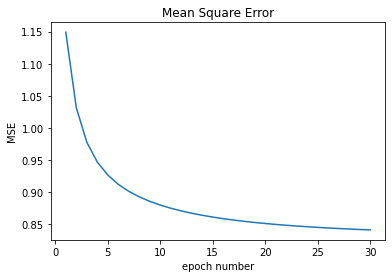

In [ ]:
import matplotlib.pyplot as plt
epoch1=[]
for k in range(1,31):
  epoch1.append(k)
plt.plot(epoch1,mse)
plt.xlabel('epoch number')
plt.ylabel('MSE')
plt.title('Mean Square Error')
plt.show()

<br>

<font color='red'> Task 2</font>

In [ ]:
data2=pd.read_csv('user_info.csv.txt')
data2.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [ ]:
data2.shape

(943, 4)

In [ ]:
data3=pd.DataFrame(pd.np.column_stack([U,data2['is_male']]))
data3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10
0,0.066226,0.007888,-0.012531,-0.086160,0.024886,0.006647,0.080063,-0.027598,0.068345,-0.020033,1.0
1,0.013644,-0.048895,0.056554,0.015811,-0.012041,0.017683,0.010717,-0.010286,0.027708,0.009072,0.0
2,0.005438,-0.025128,0.020028,0.032834,0.035079,0.001938,0.007705,-0.001007,-0.020941,0.003003,1.0
3,0.005704,-0.018211,0.010898,0.021868,0.013920,-0.014176,0.012264,-0.009134,-0.012691,-0.005962,1.0
4,0.034122,0.009005,-0.044054,-0.016040,0.004338,-0.021521,0.095713,0.079259,-0.017929,-0.029402,0.0


In [ ]:
X=data3.drop([10],axis=1)
y=data3[[10]]

In [ ]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.001, alpha=0.01, loss='log', random_state=0, penalty='l2', tol=1e-3, verbose=2)
clf

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=2, warm_start=False)

In [ ]:
clf.fit(X, y)

-- Epoch 1
Norm: 0.53, NNZs: 10, Bias: 1.297813, T: 943, Avg. loss: 0.620569
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.54, NNZs: 10, Bias: 1.058938, T: 1886, Avg. loss: 0.604121
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.54, NNZs: 10, Bias: 1.101271, T: 2829, Avg. loss: 0.599695
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.55, NNZs: 10, Bias: 0.975666, T: 3772, Avg. loss: 0.601507
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.55, NNZs: 10, Bias: 0.900646, T: 4715, Avg. loss: 0.600603
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.55, NNZs: 10, Bias: 0.940605, T: 5658, Avg. loss: 0.599962
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.55, NNZs: 10, Bias: 0.868241, T: 6601, Avg. loss: 0.599907
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.55, NNZs: 10, Bias: 0.846932, T: 7544, Avg. loss: 0.599535
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=2, warm_start=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
clf.fit(X, y)

-- Epoch 1
Norm: 1.68, NNZs: 10, Bias: 1.698101, T: 943, Avg. loss: 0.774114
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.36, NNZs: 10, Bias: 1.405251, T: 1886, Avg. loss: 0.550457
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.30, NNZs: 10, Bias: 1.347084, T: 2829, Avg. loss: 0.534826
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 10, Bias: 1.233375, T: 3772, Avg. loss: 0.524671
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.14, NNZs: 10, Bias: 1.132864, T: 4715, Avg. loss: 0.524474
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.11, NNZs: 10, Bias: 1.195050, T: 5658, Avg. loss: 0.522789
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.12, NNZs: 10, Bias: 1.102398, T: 6601, Avg. loss: 0.520600
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.16, NNZs: 10, Bias: 1.077012, T: 7544, Avg. loss: 0.520195
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.10, NNZs: 10, Bias: 1.171685, T: 8487, Avg. loss: 0.519120
Total training time

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=2, warm_start=False)

### We can see that the avg loss is lower when we scaled U.